**CIFAR CNN**

In [1]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
xtr.shape

(50000, 32, 32, 3)

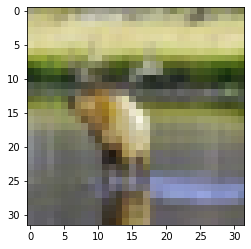

In [5]:
plt.imshow(xtr[89], cmap='gray')

In [6]:
ytr[89]


array([4], dtype=uint8)

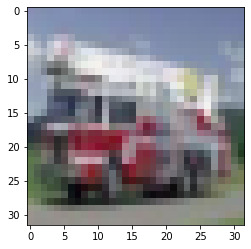

In [7]:
plt.imshow(xte[89], cmap='gray')

In [8]:
yte[89]


array([9], dtype=uint8)

In [9]:
ytr=tcg(ytr)
yte=tcg(yte)

In [10]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 227s 581ms/step - loss: 1.7630 - accuracy: 0.3390 - val_loss: 1.3910 - val_accuracy: 0.4915
Epoch 2/15
391/391 [==============================] - 228s 584ms/step - loss: 1.4013 - accuracy: 0.4933 - val_loss: 1.1799 - val_accuracy: 0.5737
Epoch 3/15
391/391 [==============================] - 227s 580ms/step - loss: 1.2491 - accuracy: 0.5505 - val_loss: 1.1072 - val_accuracy: 0.6118
Epoch 4/15
391/391 [==============================] - 228s 582ms/step - loss: 1.1533 - accuracy: 0.5900 - val_loss: 1.0208 - val_accuracy: 0.6379
Epoch 5/15
391/391 [==============================] - 226s 578ms/step - loss: 1.0775 - accuracy: 0.6164 - val_loss: 0.9394 - val_accuracy: 0.6690
Epoch 6/15
391/391 [==============================] - 227s 581ms/step - loss: 1.0139 - accuracy: 0.6407 - val_loss: 0.8847 - val_accuracy: 0.6900
Epoch 7/15
391/391 [==============================] - 227s 581ms/step - loss: 0.9635 - accuracy: 0.6581 - val_loss: 0.9097 -

In [ ]:
model.evaluate(xtr,ytr)

1563/1563 [==============================] - 54s 35ms/step - loss: 0.6079 - accuracy: 0.7915


[0.6079404354095459, 0.7915199995040894]

In [ ]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 11s 35ms/step - loss: 0.7292 - accuracy: 0.7454


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7292405962944031
Test accuracy: 0.7454000115394592


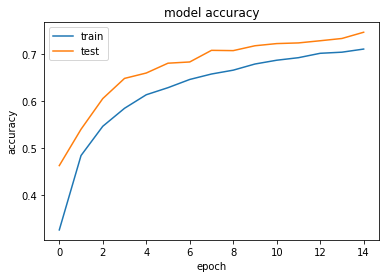

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

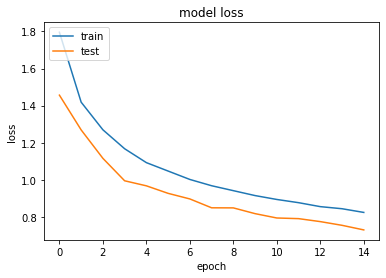

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:


model.save("CNN_cifar_10_2.h5")

In [ ]:
model.load_weights("CNN_cifar_10_2.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("CNN_cifar_10_2.h5")
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)         